In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime 

data = {
    'Name': [
        'Asafe Isidio',
        'Clara De Souza Lima Barbosa',
        'Daniel Morgan Ferreira',
        'Lídia Cardoso Dias',
        'Miguel De Souza Lima Barbosa',
        'Renato Soares Hermenegildo Perciano Griffo',
        'VALENTINA CUNHA DE OLIVEIRA'
    ],
    'Date': [
        '21/10/2018',
        '13/11/2017',
        '22/11/2017',
        '14/12/2015',
        '08/01/2016',
        '24/07/2019',
        '19/11/2017'
    ],
    'Capacidade': [
        7.5,
        6.0,
        6.5,
        11.0,
        np.nan,
        5.0,
        7.5
    ]
}

df = pd.DataFrame.from_dict(data)
df['Capacidade'] = df['Capacidade']*0.21
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# Calculate ages
current_date = datetime.now()
df['Age'] = (current_date - df['Date']).apply(lambda x: x.total_seconds()/(365*86400))
df

,Name,Date,Capacidade,Age
0,Asafe Isidio,2018-10-21,1.575,5.516103
1,Clara De Souza Lima Barbosa,2017-11-13,1.260,6.453089
2,Daniel Morgan Ferreira,2017-11-22,1.365,6.428432
3,Lídia Cardoso Dias,2015-12-14,2.310,8.370898
4,Miguel De Souza Lima Barbosa,2016-01-08,NaN,8.302404
5,Renato Soares Hermenegildo Perciano Griffo,2019-07-24,1.050,4.759939
6,VALENTINA CUNHA DE OLIVEIRA,2017-11-19,1.575,6.436651


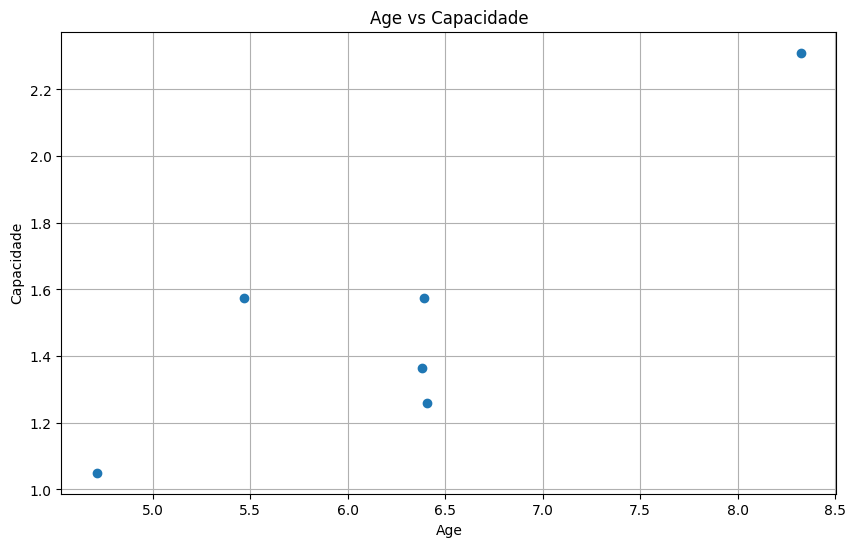

In [16]:
import matplotlib.pyplot as plt 
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Capacidade'])
plt.xlabel('Age')
plt.ylabel('Capacidade')
plt.title('Age vs Capacidade')
plt.grid(True)
plt.show()

In [17]:
fitdata = df.dropna()
coefficients = np.polyfit(fitdata['Age'], fitdata['Capacidade'], 1)
p = np.poly1d(coefficients)

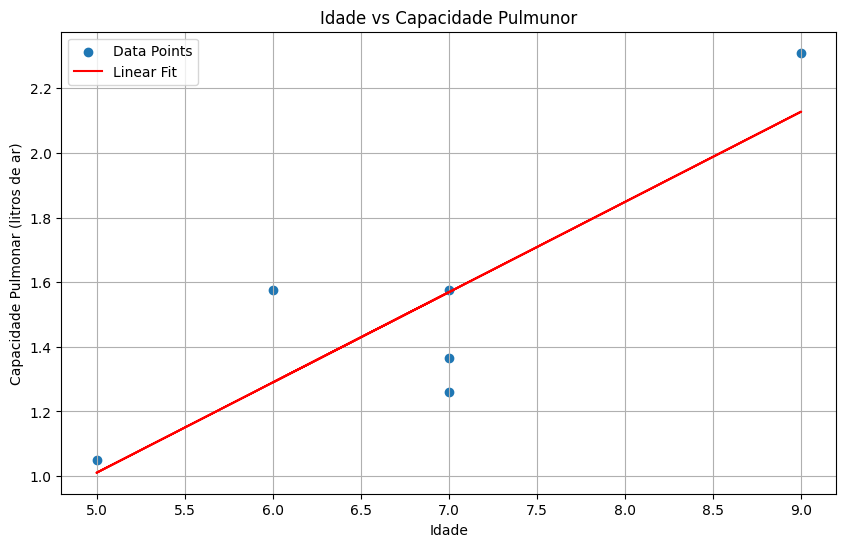

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Capacidade'], label='Data Points')
plt.plot(df['Age'], p(df['Age']), color='red', label='Linear Fit')
plt.xlabel('Idade')
plt.ylabel('Capacidade Pulmonar (litros de ar)')
plt.title('Idade vs Capacidade Pulmunor')
plt.grid(True)
plt.legend()
plt.show()

E um gráfico fitando "capacidade pulmonar" vs Idade. (*Capacidade* = 0.3 x *Idade*  - 0.4).  Para nossas amostras de medições das crianças. Super simples (sem incertezas e sem várias medições). As crianças ganham ~0.3 litros de capacidade pulmonar a cada ano de crescimento. No futuro do CC dá pra fazer bastante diversão com essas crianças e física 🤓experimental na experência do módulo de ciências.

In [19]:
p

poly1d([ 0.30892734, -0.41793817])